<a href="https://colab.research.google.com/github/HoiAlice/test/blob/master/Diplom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ttpy

     |████████████████████████████████| 317 kB 10.0 MB/s 
  Created wheel for ttpy: filename=ttpy-1.2.1-cp37-cp37m-linux_x86_64.whl size=2951704 sha256=fc5e8e3ab112953960b7cc2af9155808238f12b373b19cfd57bfd4127b6f00c0
  Stored in directory: /root/.cache/pip/wheels/1c/45/02/9593e1923b244554f33e29be39b1413772acac8c8a1ba30596
Successfully built ttpy


In [ ]:
pip install ncon

In [ ]:
pip install progress

  Created wheel for progress: filename=progress-1.6-py3-none-any.whl size=9628 sha256=7c2e2d70bcfdb4c4aaddc0e1d7a8a640ea4910fb41dfda6cfe5ebf22660ea596
  Stored in directory: /root/.cache/pip/wheels/8e/d7/61/498d8e27dc11e9805b01eb3539e2ee344436fc226daeb5fe87
Successfully built progress


In [ ]:
import tt
import numpy as np
from numpy import linalg as la
from tt.amen import amen_solve
import matplotlib.pyplot as plt
from scipy.special import factorial
from ncon import ncon

#Играемся с типовыми объектами

In [ ]:
delta = tt.delta(n = 2, d = 4, center = 15) 
print(np.diag(tt.diag(delta).full())) 

ones = tt.ones(n = 2, d = 4)
print(np.diag(tt.diag(ones).full())) 

sigma = tt.matrix(a = np.array([[0,1],[1,0]]))
print(tt.kron(sigma, tt.eye(n = 2, d = 1)).full()) # какого? аффтор перепутал порядок 
print(np.kron(np.array([[0,1],[1,0]]), np.eye(2)))
print(" ")
c1 = 1
c2 = 0
A = tt.delta(n = 2, d = 2, center = c1)
B = tt.delta(n = 2, d = 2, center = c2)
print(np.diag(tt.diag(tt.kron(A, B)).full()))
print(tt.vector.to_list(tt.kron(A, B))[0])
d = 4
center = 2**(d)
shift = 5
print( tt.Toeplitz(x = tt.stepfun(n = 2, d = d + 1, center = center) - tt.stepfun(n = 2, d = d + 1, center = center + shift), d = d).full() )

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
 
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[[0.]
  [1.]]]
[[1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 

#Кубит во внешнем классическом поле 

Постоянное поле

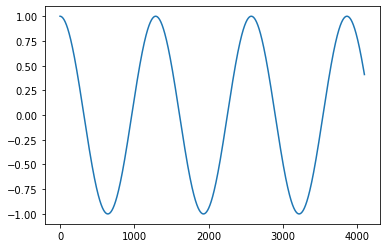

In [ ]:
T = 10
N = 12
dt = T/2**N

H_0 = tt.matrix(np.array([[0,1],[1,0]]))
psi_0 = tt.vector(np.array([1,0]))
def G_t(d):
  return tt.Toeplitz(tt.delta(n = 2, d = d + 1 , center = 2**d) - tt.delta(n = 2, d = d + 1 , center = 2**d - 1))

def M_t(d):
  return tt.Toeplitz(tt.delta(n = 2, d = d + 1 , center = 2**d) + tt.delta(n = 2, d = d + 1 , center = 2**d - 1))

A = tt.kron(tt.eye(n = 2, d = 1), G_t(N)) + (1j*dt /2) * tt.kron(H_0, M_t(N))
b = tt.kron(psi_0, tt.delta(n = 2, d = N, center = 0))

y = amen_solve(A = A, f = b, x0 = tt.ones(n = 2, d = N + 1), kickrank = 15, eps = 1e-8)

def T_t(d, t):
  return tt.kron(tt.matrix(np.array([[1,0],[0,-1]])), tt.diag(tt.delta(n = 2, d = d, center = t)))

a = [ np.real(tt.dot(y, tt.matvec(T_t(N,t), y))) for t in range(2**N) ] #заниает оч много времени
plt.plot(range(2**N), a)
plt.show()

переменное поле

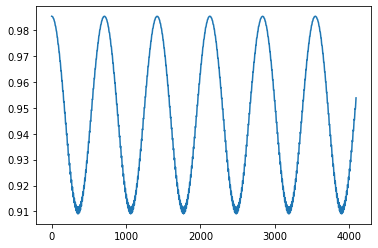

In [ ]:
T = 100
N = 12
dt = T/2**N

w = 10
Delta = 0.3
g = 0.1

H_0 = w * tt.matrix(np.array([[1,0],[0,0]]))
psi_0 = tt.vector(np.array([1,0]))

def G_t(d):
  return tt.Toeplitz(tt.delta(n = 2, d = d + 1 , center = 2**d) - tt.delta(n = 2, d = d + 1 , center = 2**d - 1))

def M_t(d):
  return tt.Toeplitz(tt.delta(n = 2, d = d + 1 , center = 2**d) + tt.delta(n = 2, d = d + 1 , center = 2**d - 1))

A = (
    tt.kron(tt.eye(n = 2, d = 1), G_t(N)) + (1j*dt /2) * tt.kron(H_0, M_t(N)) + 
    g * (1j*dt /2) * tt.kron(tt.matrix(np.array([[0,1],[1,0]])), M_t(N) @ tt.diag(tt.sin( d = N, alpha = (w + Delta)*dt, phase = 0.0)))
    )
b = tt.kron(psi_0, tt.delta(n = 2, d = N, center = 0))

y = amen_solve(A = A, f = b, x0 = tt.ones(n = 2, d = N + 1), kickrank = 15, eps = 1e-8)

def T_t(d, t):
  return tt.kron(tt.matrix(np.array([[1,0],[0,0]])), tt.diag(tt.delta(n = 2, d = d, center = t)))

a = [ np.real(tt.dot(y, tt.matvec(T_t(N,t), y))) for t in range(2**N) ] #заниает оч много времени
plt.plot(range(2**N), a)
plt.show()

#Кубит в резонаторе

=multifuncrs= sweep 1{2}, max_dy: 9.998e-01, erank: 1.89737
=multifuncrs= sweep 2{1}, max_dy: 4.042e-02, erank: 3.36155
=multifuncrs= sweep 2{2}, max_dy: 4.042e-02, erank: 4.24264
=multifuncrs= sweep 3{1}, max_dy: 4.579e-16, erank: 5.01996
=multifuncrs= sweep 3{2}, max_dy: 4.579e-16, erank: 5.35724
=multifuncrs= sweep 4{1}, max_dy: 0.000e+00, erank: 1.89737
=multifuncrs= sweep 1{2}, max_dy: 9.501e-01, erank: 1.89737
=multifuncrs= sweep 2{1}, max_dy: 5.689e-02, erank: 3.20936
=multifuncrs= sweep 2{2}, max_dy: 5.689e-02, erank: 5.44977
=multifuncrs= sweep 3{1}, max_dy: 4.823e-07, erank: 7.34166
=multifuncrs= sweep 3{2}, max_dy: 4.823e-07, erank: 7.70714
=multifuncrs= sweep 4{1}, max_dy: 5.097e-10, erank: 7.64199
=multifuncrs= sweep 4{2}, max_dy: 5.097e-10, erank: 7.70714
=multifuncrs= sweep 5{1}, max_dy: 0.000e+00, erank: 4.60435


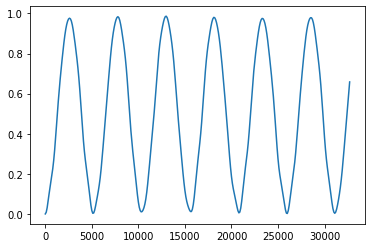

In [ ]:
#Брал в фоковском базисе. Проблема - большой ранг у X. В квадратурах вообще не заработало...

def X_hat(d): 
  x = tt.xfun(n = 2, d = d)
  x = tt.multifuncrs([x], lambda x : np.sqrt(x), 1e-8, y0=tt.ones(n = 2, d = d))
  x = tt.diag(x)
  x = x * tt.Toeplitz(tt.delta(n = 2, d = d + 1 , center = 2**d - 1)) + tt.Toeplitz(tt.delta(n = 2, d = d + 1 , center = 2**d + 1)) * x
  return x

def H_r(d,w,e): # в первом приближении малости e
  x = tt.xfun(n = 2, d = d)
  x = tt.multifuncrs([x], lambda x : w*x - e*x*x, 1e-8, y0=tt.ones(n = 2, d = d))
  x = tt.diag(x)
  return x

def G_t(d):
  return tt.Toeplitz(tt.delta(n = 2, d = d + 1 , center = 2**d) - tt.delta(n = 2, d = d + 1 , center = 2**d - 1))

def M_t(d):
  return tt.Toeplitz(tt.delta(n = 2, d = d + 1 , center = 2**d) + tt.delta(n = 2, d = d + 1 , center = 2**d - 1))

T = 10
N = 15
dt = T/2**N
K = 10

w = 10
Delta = 0.1
g = 1

H_0 = (
       w * tt.kron(tt.matrix(np.array([[1,0],[0,0]])) , tt.eye(n = 2, d = K)) + 
       tt.kron(tt.matrix(np.array([[1,0],[0,1]])), H_r(d = K, w = w + Delta, e = 0)) +
       g * tt.kron(tt.matrix(np.array([[0,1],[1,0]])), X_hat(d = K))
      )

psi_0 = tt.kron( tt.vector(np.array([0,1])), tt.delta(n = 2, d = K, center = 4))

A = tt.kron(tt.eye(n = 2, d = K + 1), G_t(N)) + (1j*dt /2) * tt.kron(H_0, M_t(N))
b = tt.kron(psi_0, tt.delta(n = 2, d = N, center = 0))

y = amen_solve(A = A, f = b, x0 = tt.ones(n = 2, d = N + K + 1), kickrank = 10, eps = 1e-8)

def T_t(d, t):
  return tt.kron(tt.kron(tt.matrix(np.array([[1,0],[0,0]])),tt.eye(n = 2, d = K)), tt.diag(tt.delta(n = 2, d = d, center = t)))

a = [ np.real(tt.dot(y, tt.matvec(T_t(N,t), y))) for t in range(0,2**N,100) ] #заниает оч много времени
plt.plot(range(0,2**N,100), a)
plt.show()

#Наработки по Grape(В РАЗРАБОТКЕ)

$\hat{H}_{t} = \hat{U} + g_{t}\hat{V}$

$A_{forward} = \hat{G} \otimes \hat{1} + \frac{i\delta}{2}(\hat{M}\otimes\hat{1})\,\,@\,\,diag(\hat{H}_{1},...,\hat{H}_{N})$

$f_{forward} = |0> \otimes \,(\frac{i\delta}{2}\hat{H}_{0} - \hat{1})|\psi_{0}>$

$A_{backward} = -\hat{G}^{\dagger}\otimes\hat{1} + \frac{i\delta}{2}(\hat{M}^{\dagger}\otimes\hat{1})\,@\,diag(\hat{H}_{0},...,\hat{H}_{N-1})$

$f_{backward} = |N-1> \otimes\,(\frac{i\delta}{2}\hat{H}_{N} + \hat{1})|\psi_{N}>$

$diag(\hat{H}_{1},...,\hat{H}_{N}) = \hat{1} \otimes \hat{U} + diag(g_{1},...,g_{N})\otimes\hat{V}$

In [ ]:
import tt
import numpy as np
from tt.amen import amen_solve
import matplotlib.pyplot as plt
from scipy.special import factorial
from ncon import ncon

class Solver():
  def __init__(self, d_time, d_qubit, w, e):

    self.d_time = d_time
    self.d_qubit = d_qubit

    x = tt.xfun(n = 2, d = self.d_qubit)
    x = tt.multifuncrs([x], lambda x : w*x - e*x*x, 1e-8, y0=tt.ones(n = 2, d = self.d_qubit))
    x = tt.diag(x)
    self.U = x #постоянная часть гамильтониана

    x = tt.xfun(n = 2, d = self.d_qubit)
    x = tt.multifuncrs([x], lambda x : np.sqrt(x), 1e-8, y0=tt.ones(n = 2, d = self.d_qubit))
    x = tt.diag(x)
    x = x * tt.Toeplitz(tt.delta(n = 2, d = self.d_qubit + 1 , center = 2**self.d_qubit - 1)) + tt.Toeplitz(tt.delta(n = 2, d = self.d_qubit + 1 , center = 2**self.d_qubit + 1)) * x
    self.V = x #переменная часть гамильтониана

    self.G = tt.Toeplitz(tt.delta(n = 2, d = d_time + 1 , center = 2**d_time) - tt.delta(n = 2, d = d_time + 1 , center = 2**d_time - 1))
    self.M = tt.Toeplitz(tt.delta(n = 2, d = d_time + 1 , center = 2**d_time) + tt.delta(n = 2, d = d_time + 1 , center = 2**d_time - 1))

  def forward_propagator(self, psi_0, g, time, x0 = None):
    delta = time/2**self.d_time
    a = tt.dot(tt.delta(n = 2, d = self.d_time, center = 0), g)
    psi_0 = tt.matvec((1j * delta / 2)*(self.U + a * self.V) - tt.eye(n = 2, d = self.d_qubit), psi_0)
    if x0 is None:
      x0 = tt.ones(n = 2, d = self.d_time + self.d_qubit)
    g = tt.matvec(tt.Toeplitz(tt.delta(n = 2, d = self.d_time + 1, center = 1) + tt.delta(n = 2, d = self.d_time + 1, center = 2**self.d_time + 1)), g) # добавить циклический сдвиг 1 -> 0
    f = tt.kron(tt.delta(n = 2, d = self.d_time, center = 0), psi_0)
    A =  tt.kron(self.G, tt.eye(n = 2, d = self.d_qubit)) + (1j * delta / 2) * tt.kron(self.M, tt.eye(n = 2, d = self.d_qubit))  @ (tt.kron(tt.eye(n = 2, d = self.d_time), self.U) + tt.kron(tt.diag(g), self.V))
    A = A.round(eps = 1e-10, rmax = 10)
    y = amen_solve(A = A, f = f, x0 = x0, kickrank = 5, nswp = 10, eps = 1e-10) 
    return y
  
  def backward_propagator(self, psi_N, g, time, x0 = None):
    delta = time/2**self.d_time
    a = tt.dot(tt.delta(n = 2, d = self.d_time, center = 0), g)
    psi_N = tt.matvec((1j * delta / 2)*(self.U + a * self.V) + tt.eye(n = 2, d = self.d_qubit), psi_N)
    if x0 is None:
      x0 = tt.ones(n = 2, d = self.d_time + self.d_qubit)
    f = tt.kron(tt.delta(n = 2, d = self.d_time, center = 2**self.d_time - 1), psi_N)
    A = tt.kron(-1 * self.G.T, tt.eye(n = 2, d = self.d_qubit)) + (1j * delta / 2) * tt.kron(self.M.T, tt.eye(n = 2, d = self.d_qubit))  @ (tt.kron(tt.eye(n = 2, d = self.d_time), self.U) + tt.kron(tt.diag(g), self.V))
    A = A.round(eps = 1e-10, rmax = 10)
    y = amen_solve(A = A, f = f, x0 = x0, kickrank = 5, nswp = 10, eps = 1e-10)
    return y

  def g_gradient(self, y_forward, y_backward):
    rg_max = 10
    M = tt.kron(tt.Toeplitz(tt.delta(n = 2, d = self.d_time + 1, center = 2**self.d_time - 1)), self.V)
    y_forward = tt.matvec(M, y_forward)

    X = tt.vector.to_list(y_forward)
    X_ = tt.vector.to_list(y_backward)
    Z = np.array([[[1,0],[0,0]],[[0,0],[0,1]]])
    Tail = np.array([[1]])
    
    for i in range(0, d_qubit): #частичный след
      tensors = [Tail,X_[i].conj(),X[i]]
      connects = [[1,2],[1,3,-1],[2,3,-2]]
      con_order = [1,2,3]
      Tail = ncon(tensors,connects,con_order)
    Tail = np.array([Tail])

    new_X = []
    for i in range(d_qubit, d_qubit + d_time): #частичная диаганализация
      tensors = [Tail,X_[i].conj(),X[i],Z]
      connects = [[-1,2,4],[2,1,-3],[4,3,-4],[1,-2,3]]
      con_order = [3,2,4,1]
      T1 = ncon(tensors,connects,con_order)
      T1 = T1.reshape(Tail.shape[0] * 2, -1)
      u, s, vh = la.svd(T1) 
      rg_true = min(rg_max, len(s)) #ограничние ранга
      u = u[:,:rg_true]
      s = s[:rg_true]
      vh = vh[:rg_true,:]
      new_X.append(u.reshape(-1,2,rg_true))
      Tail = vh.reshape(-1, X_[i].shape[2], X[i].shape[2]) 
    return (Tail[0,0,0] * tt.vector.from_list(new_X)).imag()



In [ ]:
d_time = 7
d_qubit = 3
time = 4 * 6.28
dt = time/2**d_time

w = 1
e = 0.01

solver = Solver(d_time = d_time, d_qubit = d_qubit, w = w, e = e)
psi_0 = tt.delta(n = 2, d = d_qubit, center = 0)
psi_N = np.sqrt(0.5) * (tt.delta(n = 2, d = d_qubit, center = 1) + tt.delta(n = 2, d = d_qubit, center = 0))
g = 0.001 * tt.rand(n = 2, d = d_time, r = 3)

N = 300
y1 = tt.ones(n = 2, d = d_time + d_qubit)
y2 = tt.ones(n = 2, d = d_time + d_qubit)
for i in range(N):
  y1 = solver.forward_propagator(psi_0 = psi_0, g = g, time = time, x0 = y1)
  y2 = solver.backward_propagator(psi_N = psi_N, g = g, time = time, x0 = y2)
  dg = solver.g_gradient(y_forward = y1, y_backward = y2)
  g = (g - 0.5 * dg).round(eps = 1e-10, rmax = 10)
  print(i)


=multifuncrs= sweep 1{2}, max_dy: 7.729e-01, erank: 1.63299
=multifuncrs= sweep 2{1}, max_dy: 2.276e-16, erank: 2.16025
=multifuncrs= sweep 2{2}, max_dy: 2.612e-16, erank: 2.16025
=multifuncrs= sweep 3{1}, max_dy: 0.000e+00, erank: 1.63299
=multifuncrs= sweep 1{2}, max_dy: 5.046e-01, erank: 1.63299
=multifuncrs= sweep 2{1}, max_dy: 1.761e-01, erank: 1.91485
=multifuncrs= sweep 2{2}, max_dy: 1.761e-01, erank: 1.91485
=multifuncrs= sweep 3{1}, max_dy: 6.795e-16, erank: 2.16025
=multifuncrs= sweep 3{2}, max_dy: 6.795e-16, erank: 1.91485
=multifuncrs= sweep 4{1}, max_dy: 0.000e+00, erank: 1.63299
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
12

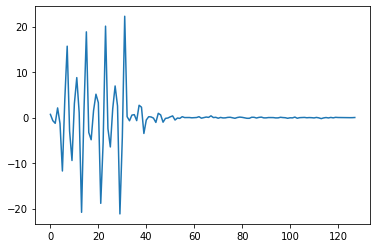

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


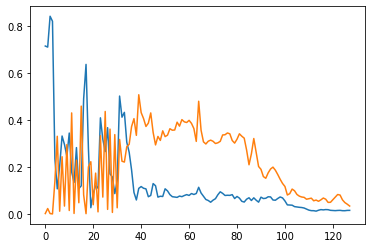

In [ ]:
 a = [ tt.dot(g, tt.delta(n = 2, d = d_time, center = t)) for t in range(2**d_time)]
 plt.plot(range(2**d_time), a)
 plt.show()

def T(n, t):
  d1 = tt.delta(n = 2, d = d_time, center = t)
  d2 = tt.delta(n = 2, d = d_qubit, center = n)
  return tt.diag(tt.kron(d1, d2))

y = solver.forward_propagator(psi_0 = psi_0, g = g, time = time)
a0 = [tt.dot(y, tt.matvec(T(0, t), y)) for t in range(2**d_time)]
a1 = [tt.dot(y, tt.matvec(T(1, t), y)) for t in range(2**d_time)]
plt.plot(range(2**d_time), a0)
plt.plot(range(2**d_time), a1)
plt.show()